1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
3. сделать feature engineering
4. обучить любой классификатор (какой вам нравится)
5. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть
6. применить random negative sampling для построения классификатора в новых условиях
7. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)
8. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Входные переменные (на основе физико-химических тестов):
1 - фиксированная кислотность
2 - летучая кислотность
3 - лимонная кислота
4 - остаточный сахар
5 - хлориды
6 - свободный диоксид серы
7 - общий диоксид серы
8 - плотность
9 - pH
10 - сульфаты
11 - спирт
Выходная переменная (на основе сенсорных данных):
12 - качество (оценка от 0 до 10)

In [149]:
%matplotlib inline
import matplotlib.pylab as plt

In [60]:
import pandas as pd
import numpy as np
data_red = pd.read_csv("winequality-red.csv", sep=';')
data_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
data_white = pd.read_csv("winequality-white.csv", sep=';')
data_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [62]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Т.к. нас пока интересует Бинарная Класификация, то сделаем feature engineering. Условимся, что quality>5 - 1 (Хороше качество), иначе 0 (плохое качетво). Так же добавим пар-р "Variety", где 1 - Красное вино, а 0 - Белое вино. Так же объединим эти 2 таблицы.

In [64]:
# добавим пар-р "Variety"
data_white['variety']=0
data_red['variety']=1

In [65]:
# меняем пар-р quality на 0/1
data_white.loc[data_white['quality']<=5,'quality']=0
data_white.loc[data_white['quality']>5,'quality']=1
data_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variety
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0


In [66]:
# меняем пар-р quality на 0/1
data_red.loc[data_red['quality']<=5,'quality']=0
data_red.loc[data_red['quality']>5,'quality']=1

data_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variety
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,1


In [69]:
# Объединяем 2 колонки
df = pd.concat([data_white, data_red], axis=0, ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variety
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,1


In [92]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'variety', 'quality'],
      dtype='object')

In [93]:
categorical_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'variety']
key_variable=['quality']

In [94]:
# Для дальнейшего удобства поменяем колонки местами
df= df.reindex(columns=categorical_columns+key_variable)

In [95]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,variety,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0


In [96]:
df.iloc[:, -1].value_counts()

1    4113
0    2384
Name: quality, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split

x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [116]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [147]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    f1 = f1_score(y_test, y_predict)
    roc = roc_auc_score(y_test, y_predict)
    rec = recall_score(y_test, y_predict, average='binary')
    prc = precision_score(y_test, y_predict, average='binary')
    return f1, roc, rec, prc
    
a,b,c,d = evaluate_results(y_test, y_predict)
print(f'f1={round(a*100,2)}%, roc={round(b*100,2)}%, rec={round(c*100,2)}%, prc={round(d*100,2)}%')

f1=84.68%, roc=78.2%, rec=87.14%, prc=82.36%


### Теперь очередь за PU learning

In [177]:
mod_data = df.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)

In [178]:
# random_negative_sampling
def random_negative_sampling (pos_sample, mod_data):
    mod_data['class_test'] = -1
    mod_data.loc[pos_sample,'class_test'] = 1
    #print('target variable:\n', mod_data.iloc[:,-1].value_counts())
    
    x_data = mod_data.iloc[:,:-2].values # just the X 
    y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
    y_positive = mod_data.iloc[:,-2].values # original class
    
    mod_data = mod_data.sample(frac=1)
    neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
    sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
    pos_sample = mod_data[mod_data['class_test']==1]
    #print(neg_sample.shape, pos_sample.shape)
    sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)
    
    model = xgb.XGBClassifier()
    model.fit(sample_train.iloc[:,:-2].values, sample_train.iloc[:,-2].values)
    y_predict = model.predict(sample_test.iloc[:,:-2].values)
    
    return evaluate_results(sample_test.iloc[:,-2].values, y_predict)
    

In [181]:
# Доли выборок и Метрики будем хранить здесь для создание таблцы
share=[]
metrics_model=[]

# Доля выборки от 10 до 65% 
for P in range(10, 70, 5):
    pos_sample_len = int(np.ceil(P/100 * len(pos_ind)))
    share.append(P)# f'{pos_sample_len}/{len(pos_ind)}'
    pos_sample = pos_ind[:pos_sample_len]
    metrics_model.append(random_negative_sampling(pos_sample, mod_data))

In [182]:
# Сформируем таблицу
table_result=pd.DataFrame(data=metrics_model, columns=['f1', 'roc', 'rec', 'prc'], index=share)
table_result

,f1,roc,rec,prc
10,0.799845,0.677988,0.894752,0.723141
15,0.782306,0.635850,0.935256,0.672350
20,0.787778,0.670043,0.926361,0.685263
25,0.790102,0.692078,0.917558,0.693737
30,0.787025,0.705937,0.926364,0.684122
35,0.782068,0.715899,0.916753,0.681889
40,0.770186,0.721495,0.921933,0.661333
45,0.783941,0.749845,0.926140,0.679596
50,0.761941,0.752969,0.917203,0.651634
55,0.762087,0.761003,0.895388,0.663333


Text(0.5, 1.0, 'prc')

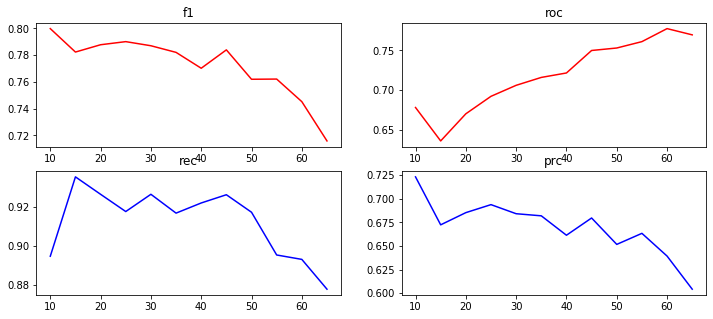

In [183]:
fig = plt.figure(figsize=(12, 5))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)


ax_1.plot(table_result.index, table_result['f1'],color = 'red', )
ax_2.plot(table_result.index, table_result['roc'],color = 'red')
ax_3.plot(table_result.index, table_result['rec'],color = 'b')
ax_4.plot(table_result.index, table_result['prc'],color = 'b')
ax_1.set_title('f1')
ax_2.set_title('roc')
ax_3.set_title('rec')
ax_4.set_title('prc')


In [ ]:
Логично, что при увеличении доли выборки у нас улучшается качетво модели вплане roc, но падает, точность и полнота. 